# MCD8010 MACHINE LEARNING - Proyecto 1

## Regression Challenge 1: Online News Popularity

*   Alejandro Pinedo
*   David Jimenez
*   Jose Carlos Nomberto

## Objectivo:
Predecir el número de "shares" para noticias en línea

# 1. Importación de librerias

In [ ]:
!pip install torch numpy pandas scikit-learn networkx matplotlib

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.optim as optim

import matplotlib.pyplot as plt
import networkx as nx

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error
)


# 2. Analisis Exploratorio (EDA)


Se realiza el Análisis Exploratorio de Datos (EDA) en el conjunto de datos `OnlineNewsPopularity.csv`, que incluye la inspección inicial de los datos, estadísticas descriptivas, análisis de la variable objetivo ('shares'), identificación de valores atípicos y ruido, y análisis de correlación. Finalmente, se resumen los hallazgos sobre las características del conjunto de datos, la etiqueta objetivo, el tamaño, los tipos de datos, los valores faltantes, los valores atípicos identificados, el ruido y cualquier posible desequilibrio.

## 2.1 Carga de base de datos

Se carga el conjunto de datos `OnlineNewsPopularity.csv` en un DataFrame de pandas llamado `df` y se muestran las primeras filas para verificación

In [ ]:
print("\n2. Análisis Exploratorio de Datos (EDA)")
print("\n2.1. Cargando base de datos en dataframe.")
df = pd.read_csv('/content/OnlineNewsPopularity.csv')
print("\n     Base de Datos cargada correctamente.")
df.head()


2. Análisis Exploratorio de Datos (EDA)

2.1. Cargando base de datos en dataframe.

     Base de Datos cargada correctamente.


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## 2.2 Inspección Inicial de datos


Se realiza la inspección inicial de los datos:

* Mostrar las dimensiones (número de filas y columnas) del DataFrame mediante el atributo .shape para validar su tamaño.
* Mostrar un resumen del DataFrame, incluyendo los tipos de datos y los valores no nulos mediante el método .info().
* Identificar los valores faltantes en el conjunto de datos mediante los métodos .isnull().sum() en el df del DataFrame.

In [ ]:
print(f"\n2. Inpección Inicial de Datos")

print(f"\n2.1 Dimensiones:")
print(f"Dimensiones de la base de datos: {df.shape[0]} filas, {df.shape[1]} columnas")

print(f"\n2.1 Info:")
df.info()
df.describe()

print(f"\n2.2 Valores faltantes:")
missing_values = df.isnull().sum()
print("Valores faltantes por columna:")
#print(missing_values[missing_values > 0])
print(missing_values)
print(f"{missing_values[missing_values > 0]}")


2. Inpección Inicial de Datos

2.1 Dimensiones:
Dimensiones de la base de datos: 39644 filas, 61 columnas

2.1 Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     3964

## 2.3 Análisis Descriptivo


Se generan estadísticas descriptivas para todas las columnas numéricas usando `df.describe()` para obtener un resumen de la tendencia central, la dispersión y la forma de la distribución, lo que puede ayudar a identificar posibles valores atípicos.

In [ ]:
print(f"\n2.3. Estadisticas descriptivas para variable numéricas")

df.describe()


2.3. Estadisticas descriptivas para variable numéricas


,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


## 2.4 Análisis de variable objetivo

Se analiza la distribución de la variable objetivo "shares", mediante un histograma y un diagrama de caja. Este paso ayudará a identificar su distribución, asimetría y la presencia de valores atípicos.

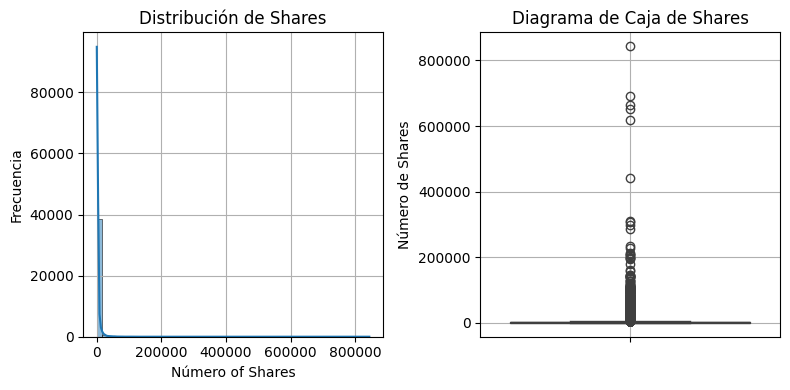

In [ ]:
# Crea histograma de la columna "shares"

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1) # Selecciona el primer plot en 1x2
sns.histplot(df[' shares'], bins=50, kde=True)
plt.title('Distribución de Shares')
plt.xlabel('Número of Shares')
plt.ylabel('Frecuencia')
plt.grid(True)

# Crea diagrama de caja de la columna "shares"
plt.subplot(1, 2, 2) # # Selecciona el segundo plot en 1x2
sns.boxplot(y=df[' shares'])
plt.title('Diagrama de Caja de Shares')
plt.ylabel('Número de Shares')
plt.grid(True)

plt.tight_layout()

plt.show()

## 1.5 Identificación de valores atípicos y ruido

Se visualiza la distribución de características numéricas clave utilizando histogramas y diagramas de caja para identificar posibles valores atípicos, asimetrías y ruido que podrían afectar el modelo de regresión.

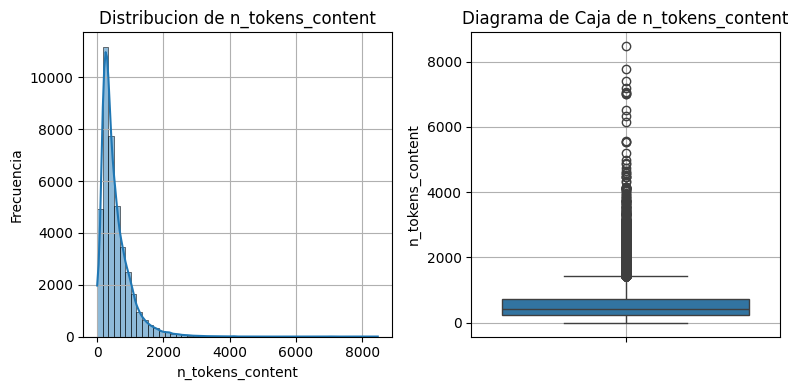

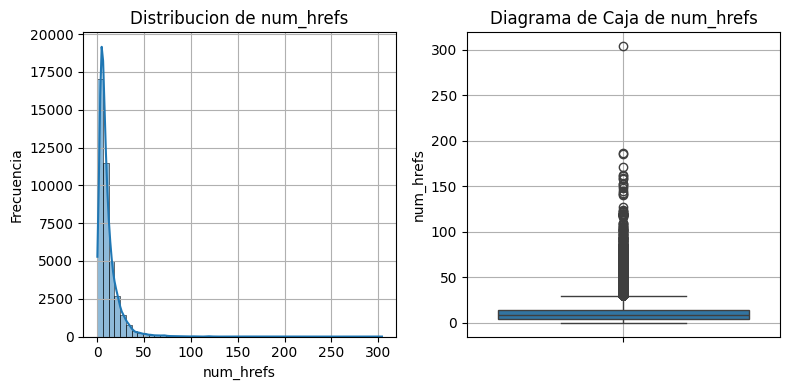

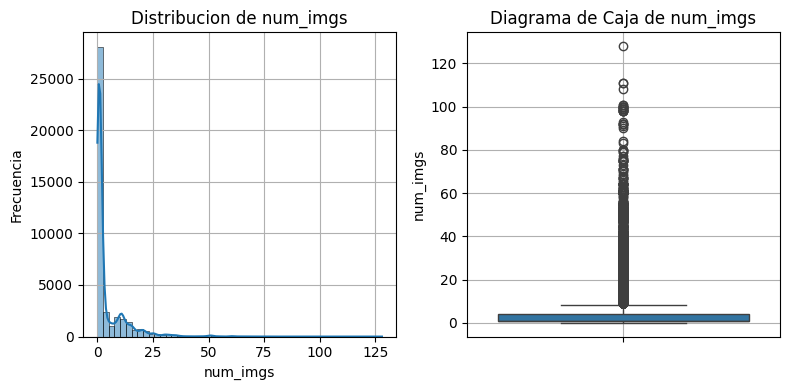

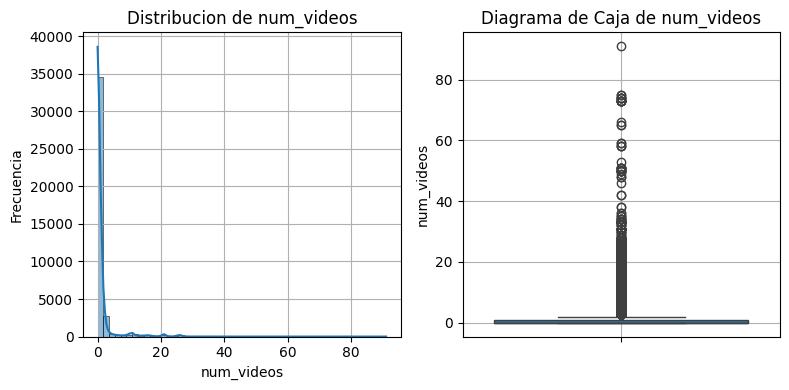

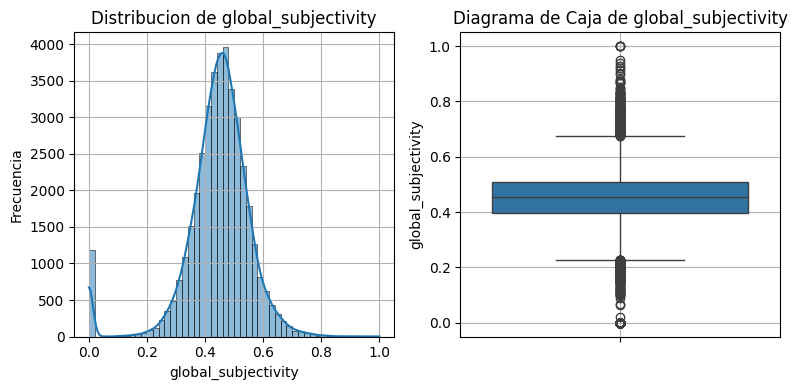

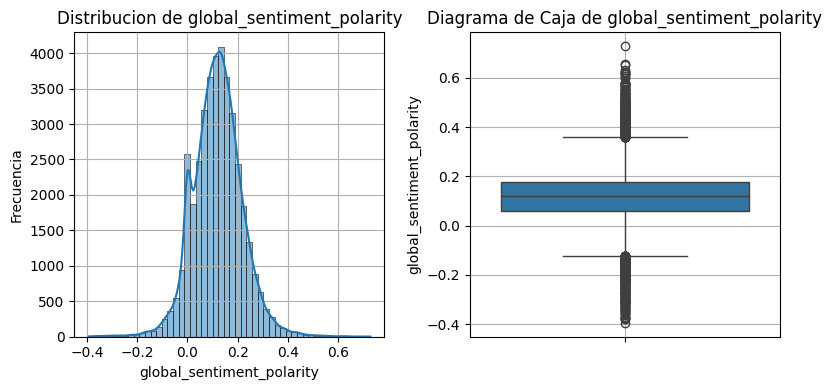

In [ ]:
key_features = [' n_tokens_content', ' num_hrefs', ' num_imgs', ' num_videos', ' global_subjectivity', ' global_sentiment_polarity']

for feature in key_features:

    plt.figure(figsize=(8, 4))
    # Crea histograma
    plt.subplot(1, 2, 1) # Selecciona el primer plot en 1x2
    sns.histplot(df[feature], bins=50, kde=True)
    plt.title(f'Distribucion de {feature.strip()}')
    plt.xlabel(feature.strip())
    plt.ylabel('Frecuencia')
    plt.grid(True)

    # Crea diagrama de caja
    plt.subplot(1, 2, 2) # # Selecciona el segundo plot en 1x2
    sns.boxplot(y=df[feature])
    plt.title(f'Diagrama de Caja de {feature.strip()}')
    plt.ylabel(feature.strip())
    plt.grid(True)

    plt.tight_layout()

    plt.show()


## 1.6 Análisis de Correlación

Se calcula y visualiza la matriz de correlación entre todas las características numéricas y la variable objetivo 'shares'.



Correlaciones con columna 'shares':
kw_avg_avg                       0.110413
LDA_03                           0.083771
kw_max_avg                       0.064306
self_reference_avg_sharess       0.057789
self_reference_min_shares        0.055958
self_reference_max_shares        0.047115
num_hrefs                        0.045404
kw_avg_max                       0.044686
kw_min_avg                       0.039551
num_imgs                         0.039388
global_subjectivity              0.031604
kw_avg_min                       0.030406
kw_max_min                       0.030114
abs_title_sentiment_polarity     0.027135
num_videos                       0.023936
title_subjectivity               0.021967
num_keywords                     0.021818
is_weekend                       0.016958
weekday_is_saturday              0.015082
title_sentiment_polarity         0.012772
avg_positive_polarity            0.012142
max_positive_polarity            0.010068
weekday_is_monday                0.0097

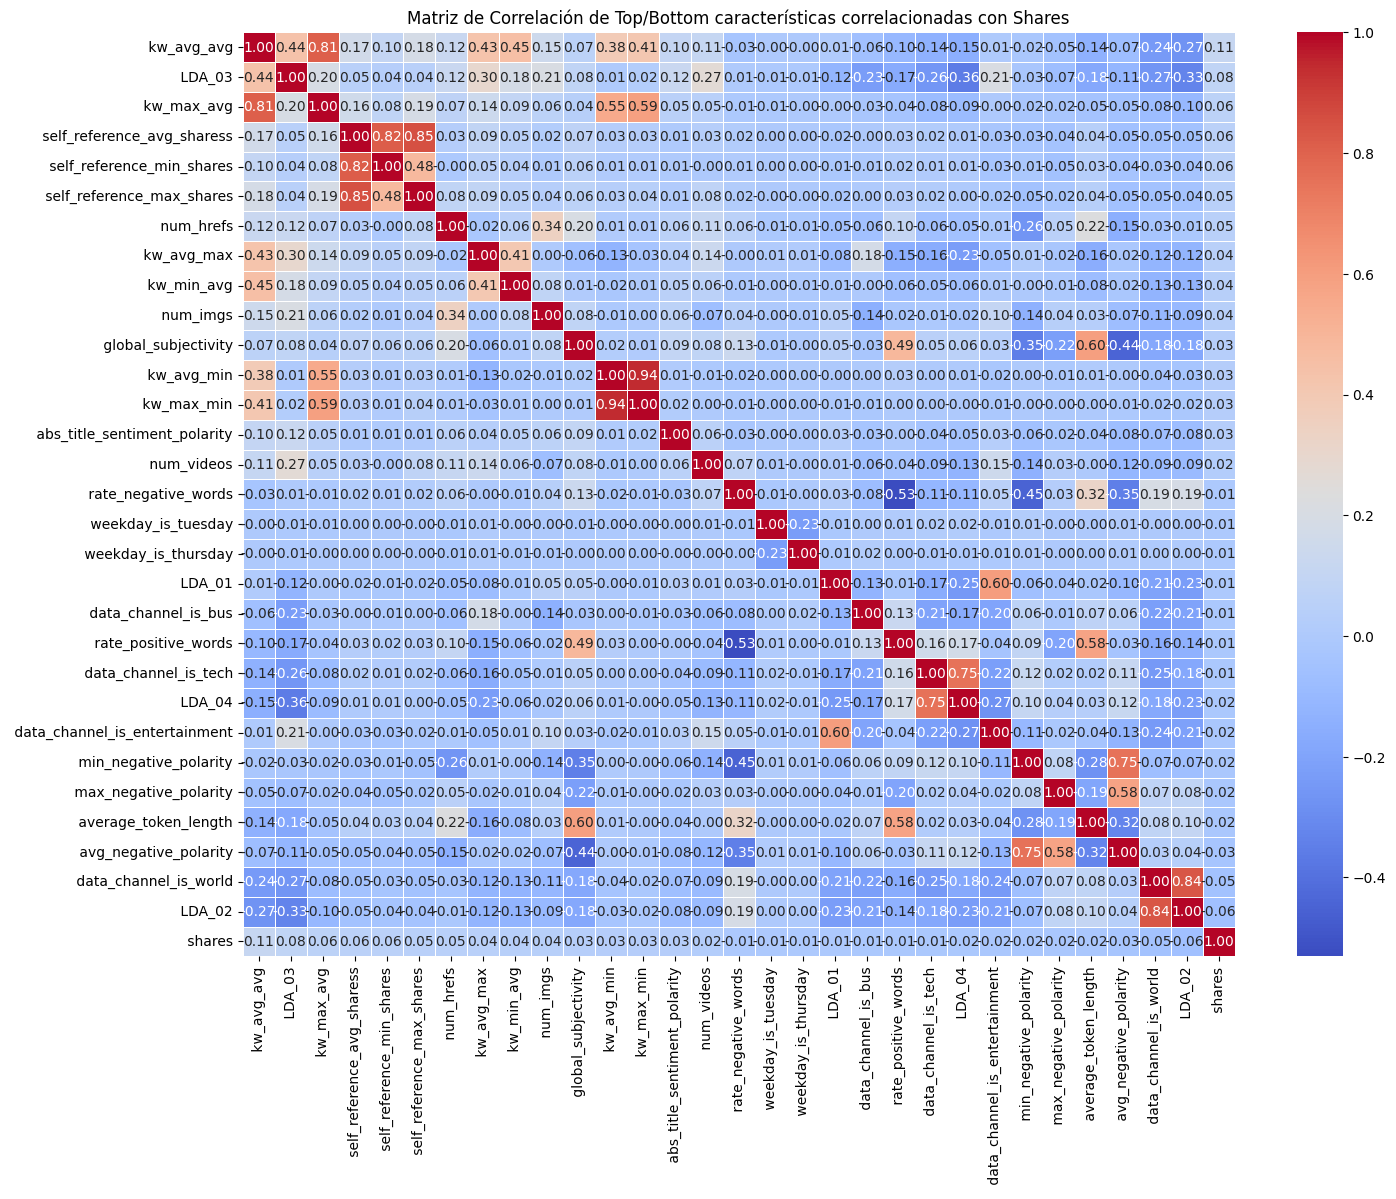

In [ ]:
# Crea una copia del Dataframe y descarta la columna 'url (non-numerical)
df_numerical = df.drop('url', axis=1)

# 1. Calcula la matriz de correlación
correlation_matrix = df_numerical.corr()

# 2. Extrae las correlaciones con la columna ' shares'
shares_correlation = correlation_matrix[' shares'].sort_values(ascending=False)

# 3. Excluye ' shares' de la lista
shares_correlation = shares_correlation.drop(' shares')

print("\nCorrelaciones con columna 'shares':")
print(shares_correlation)

# 4. Muestra las top 10 caracteristicas más correlacionadas
print("\nTop 10 características más correlacionadas con 'shares':")
print(shares_correlation.head(10))

# Muestra las botton 10 caracteristicas menos correlacionadas
print("\nBottom 10 características menos correlacionadas con 'shares':")
print(shares_correlation.tail(10))

# 5. Crea un heatmap para un subconjunto de la matriz de correlación
# Selecciona los top 15 positivos and top 15 negativos características correlacionadas para visualización
top_correlated_features = shares_correlation.head(15).index.tolist()
bottom_correlated_features = shares_correlation.tail(15).index.tolist()
selected_features = top_correlated_features + bottom_correlated_features + [' shares']

plt.figure(figsize=(16, 12))
sns.heatmap(df_numerical[selected_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Top/Bottom características correlacionadas con Shares')
plt.show()


## 1.7 Resumen de los hallazgos del Análisis Exploratorio

### Resumen del conjunto de datos
- **Tamaño**: El conjunto de datos contiene `39644` filas y `61` columnas.
- **Tipos de datos**: El conjunto de datos se compone principalmente de características numéricas (`float64` e `int64`), con una columna de tipo `object` (`url`).
- **Valores faltantes**: No hay valores faltantes en ninguna de las columnas.

### Análisis de la variable objetivo ('shares')
- **Distribución**: La variable `shares` presenta una marcada desviación a la derecha, lo que muestra que la mayoría de los artículos reciben un número relativamente bajo de "shares", mientras que un pequeño número de artículos se viralizan y reciben un número muy alto de "shares". Esto se evidencia tanto en el histograma como en el diagrama de caja.
- **Valores atípicos**: el diagrama de caja muestra claramente una cantidad significativa de valores atípicos para los "shares", con valores que se extienden mucho más allá de la distribución principal, lo que sugiere que los artículos muy populares son comunes en el conjunto de datos.

### Valores atípicos y ruido en las características clave
- **`n_tokens_content` (Número de palabras del contenido)**: La distribución está sesgada a la derecha, con muchos artículos con contenido más corto y algunos con contenido muy extenso. Se presentan valores atípicos con un número de palabras extremadamente alto.
- **`num_hrefs` (Número de enlaces)**: También sesgado a la derecha, lo que indica que la mayoría de los artículos tienen pocos enlaces, pero algunos tienen muchos. Se observan valores atípicos con un alto número de enlaces.
- **`num_imgs` (Número de imágenes)**: Similar a content y hrefs, la distribución está sesgada a la derecha, con un gran número de artículos con pocas imágenes y algunos con muchas. Muchos valores atípicos indican artículos con un número inusualmente alto de imágenes.
- **`num_videos` (Número de vídeos)**: La mayoría de los artículos no tienen vídeos, como lo muestra el pico en cero. Hay valores atípicos que representan artículos con un número significativo de vídeos.
- **`global_subjectivity`**: La distribución parece más dispersa, con valores de 0 a 1, con una ligera desviación a la izquierda, lo que sugiere que muchos artículos tienen puntuaciones de subjetividad más altas. No se identificaron valores atípicos extremos.
- **`global_sentiment_polarity`**: La distribución se centra alrededor de 0, lo que indica un sentimiento generalmente neutral, pero con un rango de negativo a positivo. Muestra una distribución bastante normal con algunos valores en los extremos.

### Análisis de correlación

La correlación entre la mayoría de las características y la variable objetivo `shares` es relativamente débil, con la correlación absoluta más alta alrededor de `0,11`.

**Las 10 características más correlacionadas (positivas)**:
- `kw_avg_avg`, `LDA_03`, `kw_max_avg` `self_reference_avg_sharess`, `self_reference_min_shares`, `self_reference_max_shares`, `num_hrefs`, `kw_avg_max`, `kw_min_avg`, `num_imgs`.


**Las 10 características menos correlacionadas (negativas)**:
- `rate_positive_words`, `data_channel_is_tech`, `LDA_04`, `data_channel_is_entertainment`,
`min_negative_polarity`, `max_negative_polarity`, `average_token_length`, `avg_negative_polarity`, `data_channel_is_world`, `LDA_02`.


**Observaciones clave**:
- Las características relacionadas con la popularidad de las palabras clave (`kw_avg_avg`, `kw_max_avg`, `kw_min_avg`, `kw_avg_max`) y la autorreferencia (`self_reference_avg_sharess`, `self_reference_min_shares`, `self_reference_max_shares`) muestran las correlaciones positivas más fuertes, aunque aún relativamente bajas. Los temas de LDA y los indicadores de canales de datos también aparecen en listas con correlaciones tanto positivas como negativas, lo que sugiere que su influencia varía según el tema o canal específico. Las características relacionadas con el sentimiento y las métricas de longitud del contenido muestran correlaciones muy débiles con las veces que se comparte.


### Próximos pasos

* **Gestionar la asimetría de los datos y los valores atípicos**: Dada la extrema asimetría y la presencia de numerosos valores atípicos en las "cuotas" de la variable objetivo y varias características clave, considere aplicar transformaciones (por ejemplo, transformación logarítmica) a estas variables. Esto podría ayudar a normalizar sus distribuciones y mejorar el rendimiento del modelo.
* **Explorar la ingeniería de características**: Con correlaciones generalmente débiles, una ingeniería de características más profunda basada en el conocimiento del dominio o en combinaciones de características existentes podría ser beneficiosa para crear variables más predictivas. Debido a la baja correlación, se puede explorar análisis de causalidad para determinar las variables más influyentes.




## 2. Preprocesamiento de Datos

### 2.1 Limpieza de Nombres de Columnas

Primero, limpiamos los nombres de las columnas para eliminar espacios en blanco iniciales y finales, lo que facilitará su manejo. Eliminamos la columna "url"

In [ ]:
df_original = df.copy()
df.columns = df.columns.str.strip()
df = df.drop(columns=["url"])

print("\n2.1 Nombres de columnas después de la limpieza:")
print(df.columns)


2.1 Nombres de columnas después de la limpieza:
Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_pola

### 2.2 Gestión de la Asimetría y Valores Atípicos mediante Transformación Logarítmica

Para manejar la asimetría y los valores atípicos en la variable objetivo ('shares') y otras características clave identificadas durante el EDA (`n_tokens_content`, `num_hrefs`, `num_imgs`, `num_videos`), aplicaremos una transformación logarítmica (log(1+x)). Esto ayuda a normalizar las distribuciones y mejora el rendimiento del modelo de regresión. Crearemos un nuevo DataFrame `df_transformed` para almacenar los datos transformados.

Las ventajas de usar la transformación logarítimica es que reduce la inclinación al sesgo, reduce impacto de outliers y hace métricas más estables

In [ ]:
print("\n2.2 Transformación logaritmica de variable shares")
df["log_shares"] = np.log1p(df["shares"])

print("Estadisticas descriptivas originales de 'shares':")
print(df['shares'].describe())

print("\nEstadísticas descriptivas luego de la transformación de 'shares':")
print(df['log_shares'].describe())


2.2 Transformación logaritmica de variable shares
Estadisticas descriptivas originales de 'shares':
count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

Estadísticas descriptivas luego de la transformación de 'shares':
count    39644.000000
mean         7.475692
std          0.929674
min          0.693147
25%          6.853299
50%          7.244942
75%          7.937732
max         13.645079
Name: log_shares, dtype: float64


### 2.3 Visualización de la Distribución Después de la Transformación

Visualizaremos las distribuciones de las variables transformadas para observar el efecto de la transformación logarítmica.

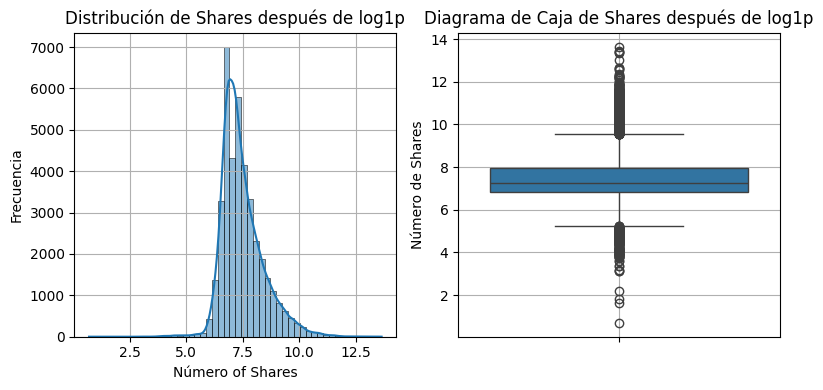

In [ ]:
plt.figure(figsize=(8, 4))
# Crea histograma de la columna "shares"
plt.subplot(1, 2, 1) # Selecciona el primer plot en 1x2
sns.histplot(df['log_shares'], bins=50, kde=True)
plt.title('Distribución de Shares después de log1p')
plt.xlabel('Número of Shares')
plt.ylabel('Frecuencia')
plt.grid(True)

# Crea diagrama de caja de la columna "shares"
plt.subplot(1, 2, 2) # # Selecciona el segundo plot en 1x2
sns.boxplot(y=df['log_shares'])
plt.title('Diagrama de Caja de Shares después de log1p')
plt.ylabel('Número de Shares')
plt.grid(True)

plt.tight_layout()

plt.show()

# 3. Selección de Características

De acuerdo al artículo "A Data Feature Extraction Method Based on the NOTEARS Causal Inference Algorithm", se concluye que el uso de NOTEARS (Non-combinatorial Optimization via Trace Exponential and Augmented lagRangian for Structure learning) para seleccionar las carácteristicas con mayor causalidad en la variable objetivo optimiza el rendimiento de los modelos de regresión para predecir de forma más precisa.



## 3.1 Preparación de datos para NOTEARS

Se remueve la columna "shares" y se aplica un escalado estándar, lo cual es necesario para poder correr el algoritmo

In [ ]:
# Dataset para NOTEARS
print("\n3.1 Preparación de dataset para NOTEARS")
df_notears = df.drop(columns=["shares"])
feature_names = df_notears.columns.tolist()

# Escalado
print("\n3.2 Escalado estándar para NOTEARS")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_notears)

X_tensor = torch.from_numpy(X_scaled).float()


3.1 Preparación de dataset para NOTEARS

3.2 Escalado estándar para NOTEARS


## 3.2 Definición de funciones base para NOTEARS

In [ ]:
# Función de Aciclidad
def h_func(W):
    '''
    Función de Aciclidad
    Entrada:
        W: Matriz de pesos
    Salida:
        Valor de la función de pérdida
    '''
    d = W.shape[0]
    return torch.trace(torch.matrix_exp(W * W)) - d

# Función de Pérdida
def loss_func(X, W):
    '''
    Función de Pérdida
    Entrada:
        X: Matriz de datos
        W: Matriz de pesos
    Salida:
        Valor de la función de pérdida
    '''
    n = X.shape[0]
    return 0.5 / n * torch.sum((X - X @ W) ** 2)

# Función de implementación de Notears
# Optimización continua, Penalización cuadrática y Multiplicador de Lagrange actualizado iterativamente
def notears_augmented(X, lambda1=0.01, max_iter=100, lr=0.01, rho_init=1.0, rho_max=1e6, h_tol=1e-8):
    '''
    Función de implementación de Notears
    Entrada:
        X: Matriz de datos
        lambda1: Parámetro de regularización
        max_iter: Número máximo de iteraciones
        lr: Tasa de aprendizaje
        rho_init: Valor inicial del multiplicador de Lagrange
        rho_max: Valor máximo del multiplicador de Lagrange
        h_tol: Tolerancia para la función de pérdida
    Salida:
        Matriz de pesos
    '''
    n, d = X.shape
    W = torch.zeros(d, d, requires_grad=True)

    rho = rho_init
    alpha = 0.0

    optimizer = optim.Adam([W], lr=lr)

    for it in range(max_iter):
        for _ in range(100):  # inner optimization
            optimizer.zero_grad()

            loss = loss_func(X, W)
            h = h_func(W)
            l1 = lambda1 * torch.sum(torch.abs(W))

            obj = loss + l1 + alpha * h + 0.5 * rho * h * h
            obj.backward()
            optimizer.step()

        with torch.no_grad():
            h_val = h_func(W).item()
            print(f"Iter {it:03d} | Loss: {loss.item():.4f} | h(W): {h_val:.6e}")

            alpha += rho * h_val

            if abs(h_val) <= h_tol:
                break

            rho = min(rho * 10, rho_max)

    return W.detach().numpy()


## 3.3 Ejecución de algoritmo NOTEARS

Se ejecuta el algoritmo NOTEARS para obtener la matriz de pesos

In [ ]:
X_sub = X_tensor[:5000]  # Valor conservador para acelerar el cómputo

W_est_mdpi = notears_augmented(
    X_sub,
    lambda1=0.01,
    max_iter=20
)


Iter 000 | Loss: 7.3715 | h(W): 1.573692e+00
Iter 001 | Loss: 10.1926 | h(W): 3.411369e-01
Iter 002 | Loss: 11.6561 | h(W): 7.784653e-02
Iter 003 | Loss: 12.5250 | h(W): 1.842499e-02
Iter 004 | Loss: 13.0873 | h(W): 4.447937e-03
Iter 005 | Loss: 13.4896 | h(W): 1.087189e-03
Iter 006 | Loss: 13.6620 | h(W): 2.365112e-04
Iter 007 | Loss: 13.6984 | h(W): 1.449585e-04
Iter 008 | Loss: 13.7205 | h(W): 1.068115e-04
Iter 009 | Loss: 13.7338 | h(W): 8.392334e-05
Iter 010 | Loss: 13.7473 | h(W): 7.247925e-05
Iter 011 | Loss: 13.7564 | h(W): 6.103516e-05
Iter 012 | Loss: 13.7613 | h(W): 5.722046e-05
Iter 013 | Loss: 13.7700 | h(W): 5.340576e-05
Iter 014 | Loss: 13.7755 | h(W): 4.959106e-05
Iter 015 | Loss: 13.7781 | h(W): 4.959106e-05
Iter 016 | Loss: 18.5163 | h(W): 2.670288e-04
Iter 017 | Loss: 16.6661 | h(W): 1.106262e-04
Iter 018 | Loss: 15.8847 | h(W): 7.247925e-05
Iter 019 | Loss: 15.4302 | h(W): 5.340576e-05


## 3.4 Extracción de pesos causales

Se extraen los pesos de cada variable con la variable objetivo "log_shares"

In [ ]:
target = "log_shares"
target_idx = feature_names.index(target)

causal_weights = []

for i, feature in enumerate(feature_names):
    if feature == target:
        continue

    weight = W_est_mdpi[i, target_idx]
    causal_weights.append((feature, weight))


## 3.5 Ordenamiento del dataframe por causalidad

Se ordena el dataframe por causalidad y se agrega la columna "Abs_Weight" para obtener los valores absolutos de los pesos calculados

In [ ]:
causal_df = (
    pd.DataFrame(causal_weights, columns=["Feature", "Causal_Weight"])
    .assign(Abs_Weight=lambda x: x["Causal_Weight"].abs())
    .sort_values("Abs_Weight", ascending=False)
    .reset_index(drop=True)
)

causal_df.head(15)


,Feature,Causal_Weight,Abs_Weight
0,kw_avg_avg,0.138527,0.138527
1,data_channel_is_bus,-0.106860,0.106860
2,is_weekend,0.074609,0.074609
3,weekday_is_saturday,0.073240,0.073240
4,data_channel_is_entertainment,-0.069039,0.069039
5,data_channel_is_world,-0.068842,0.068842
6,LDA_00,0.061770,0.061770
7,kw_min_min,0.031124,0.031124
8,data_channel_is_tech,0.028286,0.028286
9,weekday_is_friday,0.027171,0.027171


## 3.6 Diagrama de barras de pesos causales

Se genera el diagrama de barra para visualizar los pesos causales de todas las variables con la variable objetivo "log_shares"

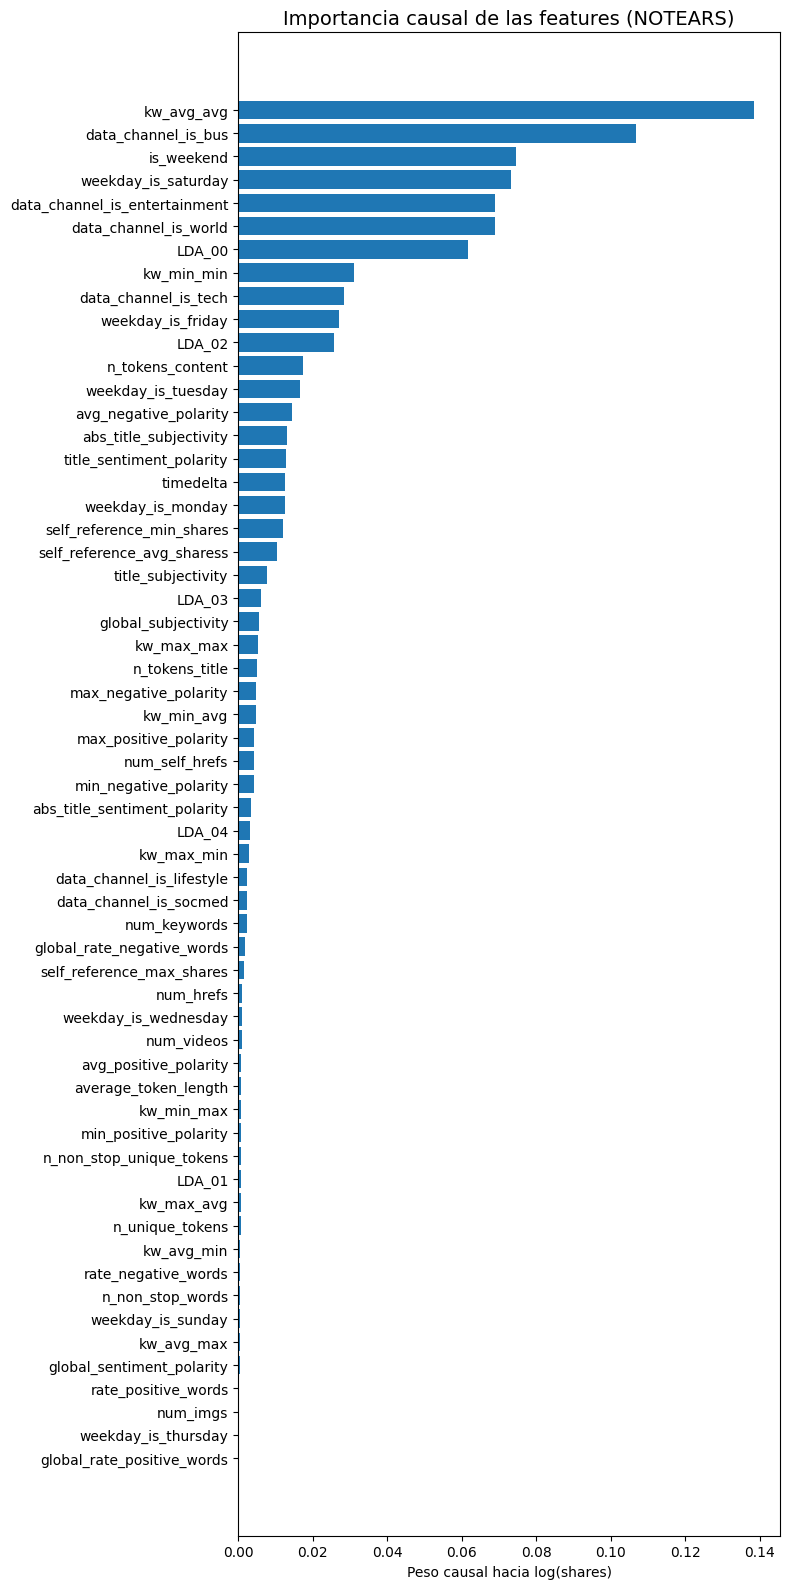

In [ ]:
plt.figure(figsize=(8, 16))

plt.barh(
    causal_df["Feature"],
    #causal_df["Causal_Weight"]
    causal_df["Abs_Weight"]
)
plt.gca().invert_yaxis()
plt.xlabel("Peso causal hacia log(shares)")
plt.title("Importancia causal de las features (NOTEARS)", fontsize=14)
plt.tight_layout()
plt.show()


## 3.7 Diagrama de barras de pesos causales Top "K"

Se observa que las 15 variables con causalidad más alta están sobre la media y el aporte de las variables restantes es mínimo para la causalidad de la variable objetivo. Por lo que se genera el gráfico de barras para las Top 115

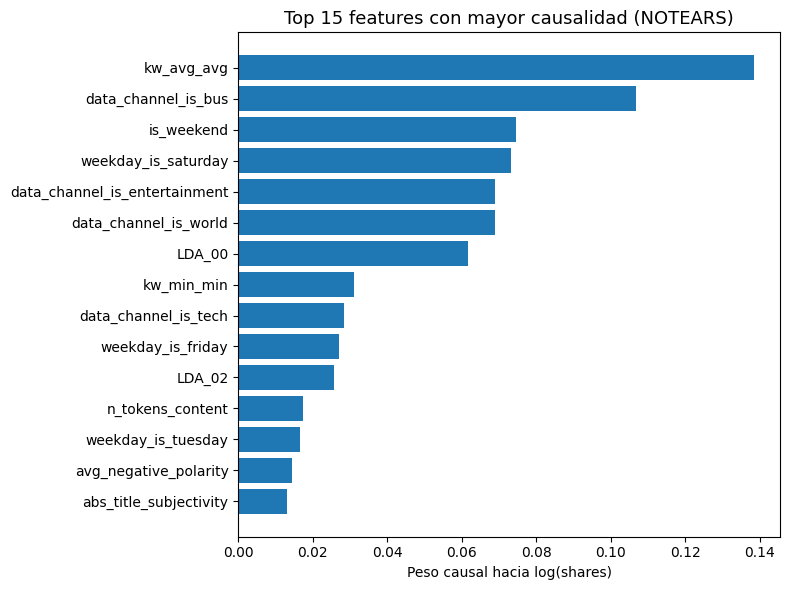

In [ ]:
# DIAGRAMA TOP_K FEATURES CAUSALES

TOP_K = 15

top_causal_df = causal_df.head(TOP_K)
plt.figure(figsize=(8, 6))
plt.barh(
    top_causal_df["Feature"],
    #top_causal_df["Causal_Weight"]
    top_causal_df["Abs_Weight"]
)
plt.gca().invert_yaxis()
plt.xlabel("Peso causal hacia log(shares)")
plt.title(f"Top {TOP_K} features con mayor causalidad (NOTEARS)", fontsize=13)
plt.tight_layout()
plt.show()


## 3.8 Conclusiones

El algoritmo NOTEARS implementado en base al artículo de referencia considera:
*   Minimización de pérdida con penalización cuadrática
*   Actualización de multiplicadores de Lagrange
*   Incremento adaptativo de penalización: ρ


El algoritmo NOTEARS permite identificar relaciones causales directas entre variables predictoras y la popularidad de las noticias.

Como resultado se observa que métricas relacionadas con palabras clave, canales de datos (bus, entretenimiento, tech), y noticias en viernes, sabados y fines de semana ejercen una influencia directa sobre la variable objetivo, justificando su selección para los modelos predictivos.

# 4. Evaluación de Modelos de Regresión

## 4.1 Función para evaluación de modelos

In [ ]:
def evaluate_model(name, model, X_test, y_test):
    '''
    Funcion para evaluar modelos de regresión
    Entrada:
        name: nombre del modelo
        model: modelo de regresión
        X_test: conjunto de datos de prueba
        y_test: variable objetivo de prueba
    Salida:
        Diccionario con métricas de evaluación
    '''
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    return {
        "Modelo": name,
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mse,
        "RMSE": rmse
    }


## 4.2 Evaluación de Modelos sin NOTEARS

Primero se evaluan los modelos sin el uso del algortimo NOTEARS para evaluar la performance y precisión para la predicción.

### 4.2.1 Definición de Pipelines

Se define el pipeline para los modelos:

*   Random Forest con 300 árboles de profundidad 15 utilizando todos los core disponibles.
*   SVM con StandarScaler (centro en 0. y varianza 1) para evitar dominio de variables grandes y que el hiperplano se deforme.
*   AdaBoost con MinMaxScaler para estabilizar valores con escalas muy distintas, con 200 árboles y tasa de aprendizaje de 5%.



In [ ]:
models_no_causal = {
    "RandomForest": Pipeline([
        ("model", RandomForestRegressor(
            n_estimators=300,
            max_depth=15,
            random_state=42,
            n_jobs=-1
        ))
    ]),

    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVR(
            kernel="rbf",
            C=10,
            epsilon=0.1
        ))
    ]),

    "AdaBoost": Pipeline([
        ("scaler", MinMaxScaler()),
        ("model", AdaBoostRegressor(
            n_estimators=200,
            learning_rate=0.05,
            random_state=42
        ))
    ])
}


### 4.2.2 División de dataset

Se divide el dataset en variables (X) y variable objetivo (y), y se divide. en datos para entrenamiento y prueba con una relación de 80%/20%

In [ ]:

top_correlated_features2 = [feature.lstrip() for feature in top_correlated_features]
print(top_correlated_features2)

['kw_avg_avg', 'LDA_03', 'kw_max_avg', 'self_reference_avg_sharess', 'self_reference_min_shares', 'self_reference_max_shares', 'num_hrefs', 'kw_avg_max', 'kw_min_avg', 'num_imgs', 'global_subjectivity', 'kw_avg_min', 'kw_max_min', 'abs_title_sentiment_polarity', 'num_videos']


In [ ]:
print("\n4.2.2 Preparación y división de dataset para modelado")
#X = df.drop(columns=["shares", "log_shares"])
X = df[top_correlated_features2]
y = df["log_shares"]

print(X)
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


4.1 Preparación y división de dataset para modelado
        kw_avg_avg    LDA_03   kw_max_avg  self_reference_avg_sharess  \
0         0.000000  0.041263     0.000000                  496.000000   
1         0.000000  0.050101     0.000000                    0.000000   
2         0.000000  0.033334     0.000000                  918.000000   
3         0.000000  0.028905     0.000000                    0.000000   
4         0.000000  0.028572     0.000000                 3151.157895   
...            ...       ...          ...                         ...   
39639  3031.115764  0.025000  4004.342857                37033.333333   
39640  3411.660830  0.681635  5470.168651                 2100.000000   
39641  4206.439195  0.643794  6880.687034                 1400.000000   
39642  1777.895883  0.040002  3384.316871                  452.000000   
39643  3296.909481  0.050659  3613.512953                 2100.000000   

       self_reference_min_shares  self_reference_max_shares  num_hrefs

### 4.2.3 Entrenamiento y Evaluación

Se realiza el entrenamiento y evaluación de los tres modelos en secuencia y se agregan los resultados de cada uno a un dataframe para posterior visualización

In [ ]:
print("\n5.2 Entrenamiento y evaluación con variables completas:")
results = []
for name, model in models_no_causal.items():
    print(f"    Entrenando modelo {name}...")
    model.fit(X_train, y_train)
    print(f"    Evaluando modelo {name}...")
    results.append(
        evaluate_model(name + " (No NOTEARS)", model, X_test, y_test)
    )
results_no_causal = pd.DataFrame(results)


5.2 Entrenamiento y evaluación con variables completas:
    Entrenando modelo RandomForest...
    Evaluando modelo RandomForest...
    Entrenando modelo SVM...
    Evaluando modelo SVM...
    Entrenando modelo AdaBoost...
    Evaluando modelo AdaBoost...


In [ ]:
results_no_causal

,Modelo,R2,MAE,MSE,RMSE
0,RandomForest (No NOTEARS),0.134611,0.646868,0.741816,0.861288
1,SVM (No NOTEARS),0.079867,0.638140,0.788743,0.888112
2,AdaBoost (No NOTEARS),0.021226,0.734723,0.839010,0.915975


### 4.2.4 Hallazgos

Los resultados indican que:

*  Random Forest supera ampliamente a SVR y AdaBoost, alcanzando un R² de 0.17 frente a 0.04 y 0.02 respectivamente, lo que sugiere que el dataset presenta alta no linealidad, ruido y multicolinealidad, condiciones bajo las cuales los métodos basados en bagging como Random Forest, tienden a ser más robustos que los métodos basados en margen o boosting como SVR y Adaboost.

* El problema es difícil de forma natural, ya que hay mucha varianza no explicada.

* RandomForest es el modelo más adecuado sin aplica ingeniria de caracteristicas con causalidad.

* SVM y AdaBoost están siendo perjudicados por ruido y dimensionalidad.



## 4.3 Evaluación de Modelos con FSNT NOTEARS

### 4.3.1 Obtener los top causal features

In [ ]:
causal_features = top_causal_df["Feature"].tolist()
print("\n4.3.1 Funcionales de causalidad Top:")
print(causal_features)


4.3.1 Funcionales de causalidad Top:
['kw_avg_avg', 'data_channel_is_bus', 'is_weekend', 'weekday_is_saturday', 'data_channel_is_entertainment', 'data_channel_is_world', 'LDA_00', 'kw_min_min', 'data_channel_is_tech', 'weekday_is_friday', 'LDA_02', 'n_tokens_content', 'weekday_is_tuesday', 'avg_negative_polarity', 'abs_title_subjectivity']


### 4.3.2 Subconjunto de datos con features causales

Se divide el dataset en variables (X) y variable objetivo (y), y se divide. en datos para entrenamiento y prueba con una relación de 80%/20%

In [ ]:
print("\n4.3.2 División de dataframe para entrenamiento y prueba con variables causales:")
X_causal = df[causal_features]
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_causal, y, test_size=0.2, random_state=42
)
print("\n    División de dataframe realizada")


4.3.2 División de dataframe para entrenamiento y prueba con variables causales:

    División de dataframe realizada


### 4.3.3 Pipelines con features causales

Se define el pipeline para los modelos:

*   Random Forest con 300 árboles de profundidad 15 utilizando todos los core disponibles.
*   SVM con StandarScaler (centro en 0. y varianza 1) para evitar dominio de variables grandes y que el hiperplano se deforme.
*   AdaBoost con MinMaxScaler para estabilizar valores con escalas muy distintas, con 200 árboles y tasa de aprendizaje de 5%.



In [ ]:
print("\n4.3.3 Definición de Pipelines para modelos de regresión:")
models_causal = {
    "RandomForest": Pipeline([
        ("model", RandomForestRegressor(
            n_estimators=300,
            max_depth=15,
            random_state=42,
            n_jobs=-1
        ))
    ]),

    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("model", SVR(
            kernel="rbf",
            C=10,
            epsilon=0.1
        ))
    ]),

    "AdaBoost": Pipeline([
        ("scaler", MinMaxScaler()),
        ("model", AdaBoostRegressor(
            n_estimators=200,
            learning_rate=0.05,
            random_state=42
        ))
    ])
}



4.3.3 Definición de Pipelines para modelos de regresión:


### 4.3.4 Entrenamiento y evaluación causal

Se realiza el entrenamiento y evaluación de los tres modelos en secuencia y se agregan los resultados de cada uno a un dataframe para posterior visualización

In [ ]:
print("\n4.3.4 Entrenamiento y evaluación con variables causales:")
results = []

for name, model in models_causal.items():
    print(f"    Entrenando modelo {name}...")
    model.fit(X_train_c, y_train_c)
    print(f"    Evaluando modelo {name}...")
    results.append(
        evaluate_model(name + " (NOTEARS)", model, X_test_c, y_test_c)
    )

results_causal = pd.DataFrame(results)


4.3.4 Entrenamiento y evaluación con variables causales:
    Entrenando modelo RandomForest...
    Evaluando modelo RandomForest...
    Entrenando modelo SVM...
    Evaluando modelo SVM...
    Entrenando modelo AdaBoost...
    Evaluando modelo AdaBoost...


In [ ]:
results_causal

,Modelo,R2,MAE,MSE,RMSE
0,RandomForest (NOTEARS),0.125183,0.645968,0.749898,0.865967
1,SVM (NOTEARS),0.066437,0.634340,0.800256,0.894570
2,AdaBoost (NOTEARS),0.012588,0.742999,0.846415,0.920008


# 5. Comparación de resultados

Luego de correr los modelos con todos las variables (NO NOTEARS) y luego con las variables de mayor causalidad (NOTEARS) se comparan los resultados en base a las métricas de performance obtenidas

In [ ]:
print("\n5. Comparación de resultados No NOTEARS vs NOTEARS:")
final_results = pd.concat(
    [results_no_causal, results_causal],
    ignore_index=True
)

final_results.sort_values("RMSE")
print(final_results)


5. Comparación de resultados No NOTEARS vs NOTEARS:
                      Modelo        R2       MAE       MSE      RMSE
0  RandomForest (No NOTEARS)  0.134611  0.646868  0.741816  0.861288
1           SVM (No NOTEARS)  0.079867  0.638140  0.788743  0.888112
2      AdaBoost (No NOTEARS)  0.021226  0.734723  0.839010  0.915975
3     RandomForest (NOTEARS)  0.125183  0.645968  0.749898  0.865967
4              SVM (NOTEARS)  0.066437  0.634340  0.800256  0.894570
5         AdaBoost (NOTEARS)  0.012588  0.742999  0.846415  0.920008
